In [328]:
import numpy as np
import nibabel as nib

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline



In [329]:
# load the NIfTI image to create a nibabel image object 'img'
img=nib.load("/home/ege/Nilearn/ds102/sub001/BOLD//task001_run001/bold.nii.gz")


In [330]:
data = img.get_data()
print(data.shape)

(64, 64, 40, 146)


In [331]:
center_voxel_time_series = data[32, 32, 20, :]
print(center_voxel_time_series)
print(center_voxel_time_series.shape)

[452 475 460 473 457 476 485 470 478 485 476 488 469 482 487 474 482 418
 460 488 482 495 466 468 504 479 495 500 482 484 497 489 478 505 498 493
 448 481 483 526 492 527 498 494 482 491 475 496 532 482 496 508 494 468
 475 490 496 517 496 436 480 468 478 491 492 496 460 467 472 481 481 462
 480 477 460 485 476 507 483 468 441 485 460 492 456 454 478 452 496 453
 470 451 453 429 446 418 412 464 458 465 429 426 417 440 449 450 438 435
 426 457 433 456 457 459 473 454 448 474 439 482 458 449 437 441 413 414
 424 429 426 432 416 448 430 447 453 426 446 438 447 418 430 447 403 450
 406 384]
(146,)


In [332]:
middle_slice_t0 = data[:, :, 20, -1]  # Using negative numbers allows you to count *from the end*
print(middle_slice_t0)
print(middle_slice_t0.shape)

[[ 9 28 20 ...,  9 24  8]
 [10  8  4 ..., 20 13 13]
 [ 5 17 30 ..., 14 13  6]
 ..., 
 [11  8 10 ...,  6 21 15]
 [ 5 17 26 ..., 14 18  8]
 [ 0  0  0 ...,  0  0  0]]
(64, 64)


In [333]:
print(np.mean(center_voxel_time_series))
print(np.std(center_voxel_time_series))

# TSNR is mean/std:
print(np.mean(center_voxel_time_series)/np.std(center_voxel_time_series))

464.95890411
27.6407671702
16.8214905631


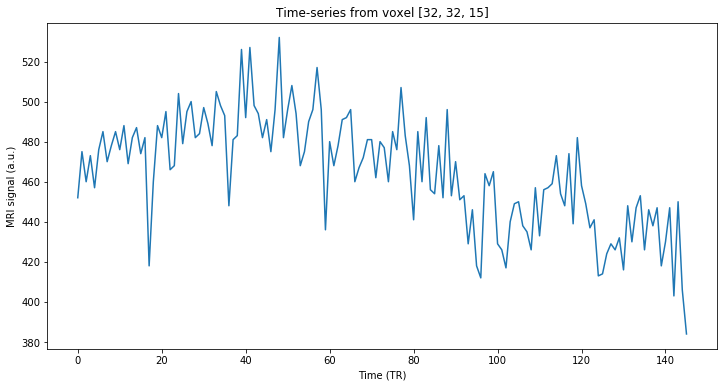

In [334]:
fig, ax = plt.subplots(1)
ax.plot(data[32, 32, 20, :])
ax.set_xlabel('Time (TR)')
ax.set_ylabel('MRI signal (a.u.)')
ax.set_title('Time-series from voxel [32, 32, 15]')
fig.set_size_inches([12, 6])

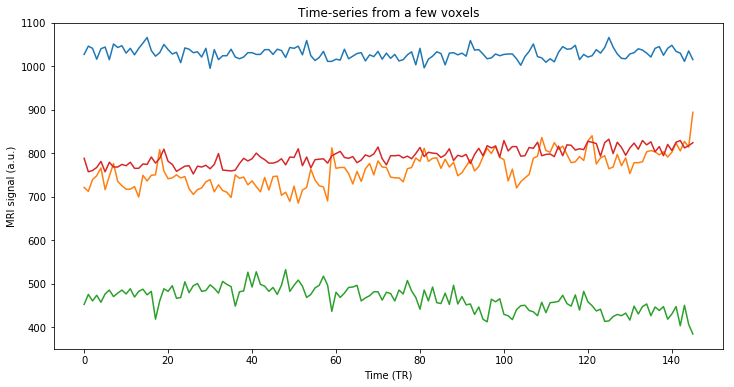

In [335]:
fig, ax = plt.subplots(1)
ax.plot(data[32, 32, 18, :])
ax.plot(data[32, 32, 19, :])
ax.plot(data[32, 32, 20, :])
ax.plot(data[32, 32, 21, :])
ax.set_xlabel('Time (TR)')
ax.set_ylabel('MRI signal (a.u.)')
ax.set_title('Time-series from a few voxels')
fig.set_size_inches([12, 6])

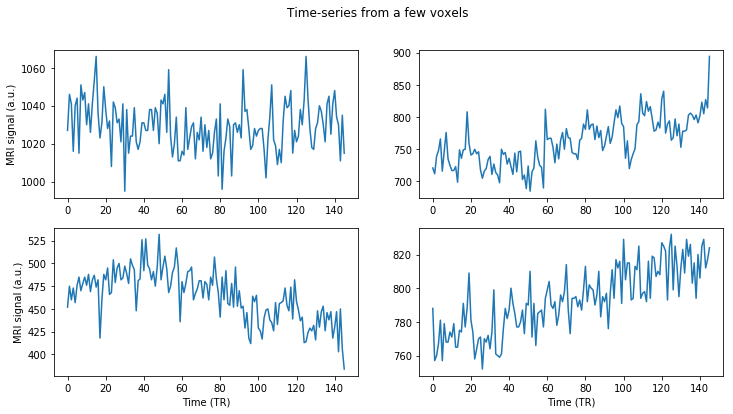

In [336]:
fig, ax = plt.subplots(2, 2)
ax[0, 0].plot(data[32, 32, 18, :])
ax[0, 1].plot(data[32, 32, 19, :])
ax[1, 0].plot(data[32, 32, 20, :])
ax[1, 1].plot(data[32, 32, 21, :])
ax[1, 0].set_xlabel('Time (TR)')
ax[1, 1].set_xlabel('Time (TR)')
ax[0, 0].set_ylabel('MRI signal (a.u.)')
ax[1, 0].set_ylabel('MRI signal (a.u.)')
# Note that we now set the title through the fig object!
fig.suptitle('Time-series from a few voxels')
fig.set_size_inches([12, 6])

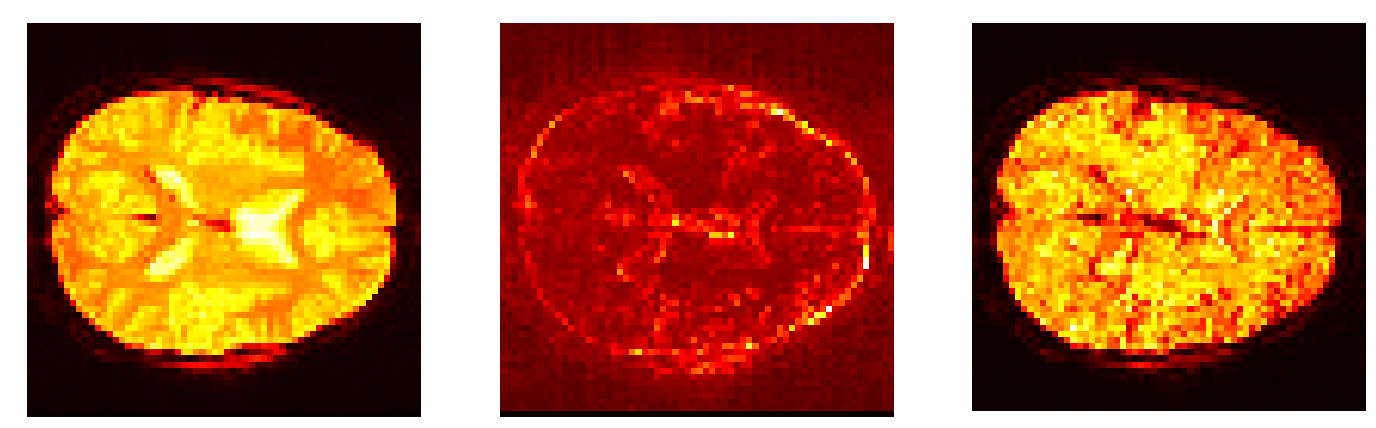

In [337]:
fig, ax = plt.subplots(1, 3)
# We'll use a reasonable colormap, and no smoothing:
ax[0].matshow(np.mean(data[:, :, 20], -1), cmap=mpl.cm.hot)
ax[0].axis('off')
ax[1].matshow(np.std(data[:, :, 20], -1), cmap=mpl.cm.hot)
ax[1].axis('off')
ax[2].matshow(((np.mean(data[:, :, 20], -1))/(np.std(data[:, :, 20], -1))), cmap=mpl.cm.hot)
ax[2].axis('off')
#ax[0, 1].matshow((10*np.log10(((np.mean(data[:, :, 20], -1))**2)/((np.std(data[:, :, 20], -1))**2))), cmap=mpl.cm.hot)
#ax[0, 1].axis('off')
fig.set_size_inches([24, 12])

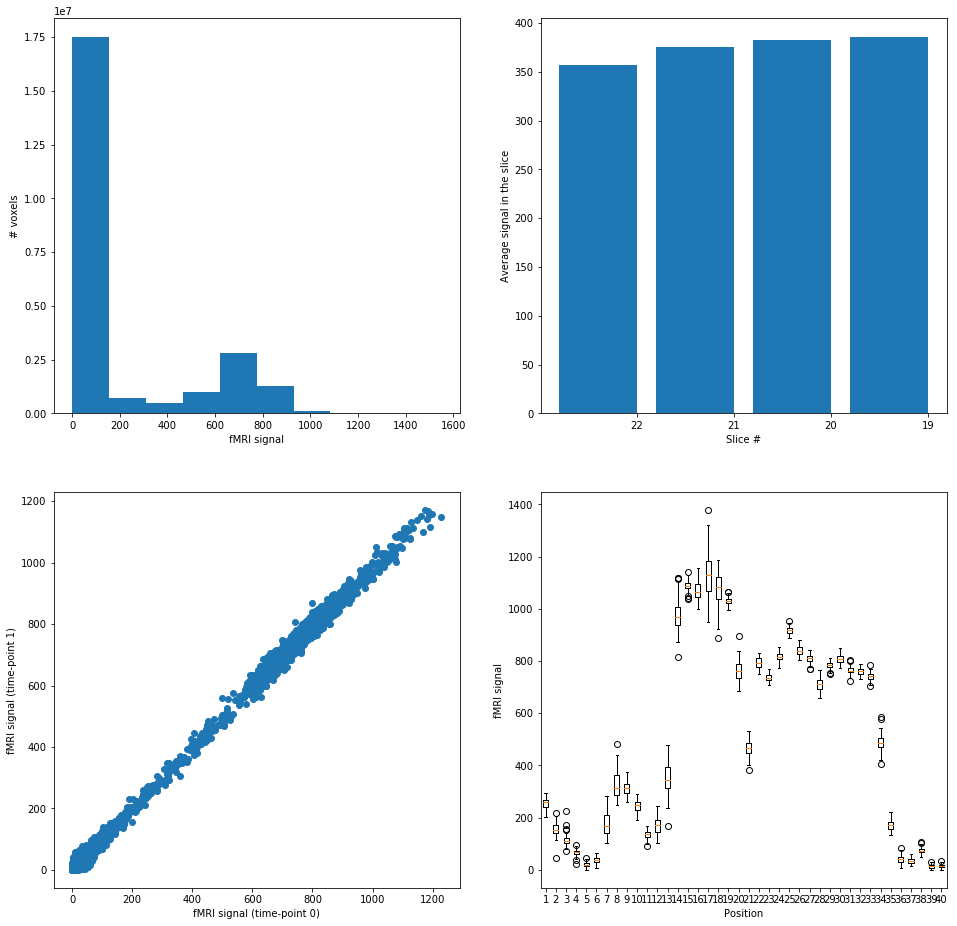

In [338]:
fig, ax = plt.subplots(2, 2)

ax[0, 0].hist(np.ravel(data))
ax[0, 0].set_xlabel("fMRI signal")
ax[0, 0].set_ylabel("# voxels")

# Bars are 0.8 wide:
ax[0, 1].bar([0.6, 1.6, 2.6, 3.6], [np.mean(data[:, :, 22]), np.mean(data[:, :, 21]), np.mean(data[:, :, 20]), np.mean(data[:, :, 19])])
ax[0, 1].set_ylabel("Average signal in the slice")
ax[0, 1].set_xticks([1,2,3,4])
ax[0, 1].set_xticklabels(["22", "21", "20", "19"])
ax[0, 1].set_xlabel("Slice #")

# Compares subsequent time-points:
ax[1, 0].scatter(data[:, :, 20, 0], data[:, :, 20, 1])
ax[1, 0].set_xlabel("fMRI signal (time-point 0)")
ax[1, 0].set_ylabel("fMRI signal (time-point 1)")

# `.T` denotes a transposition
ax[1, 1].boxplot(data[32, 32].T)
fig.set_size_inches([16, 16])
ax[1, 1].set_xlabel("Position")
ax[1, 1].set_ylabel("fMRI signal")

In [339]:
#np.seterr(divide='ignore', invalid='ignore')
mean = np.mean(data, axis=-1) # Select the last dimension
std = np.std(data, axis=-1)
tsnr = np.mean(data, -1) / np.std(data, -1)
#tsnr = 10*np.log10(mean_tseries**2/std_tseries**2)

print(mean_tseries.shape)
print(std_tseries.shape)
print(tsnr.shape)






(64, 64, 40)
(64, 64, 40)
(64, 64, 40)


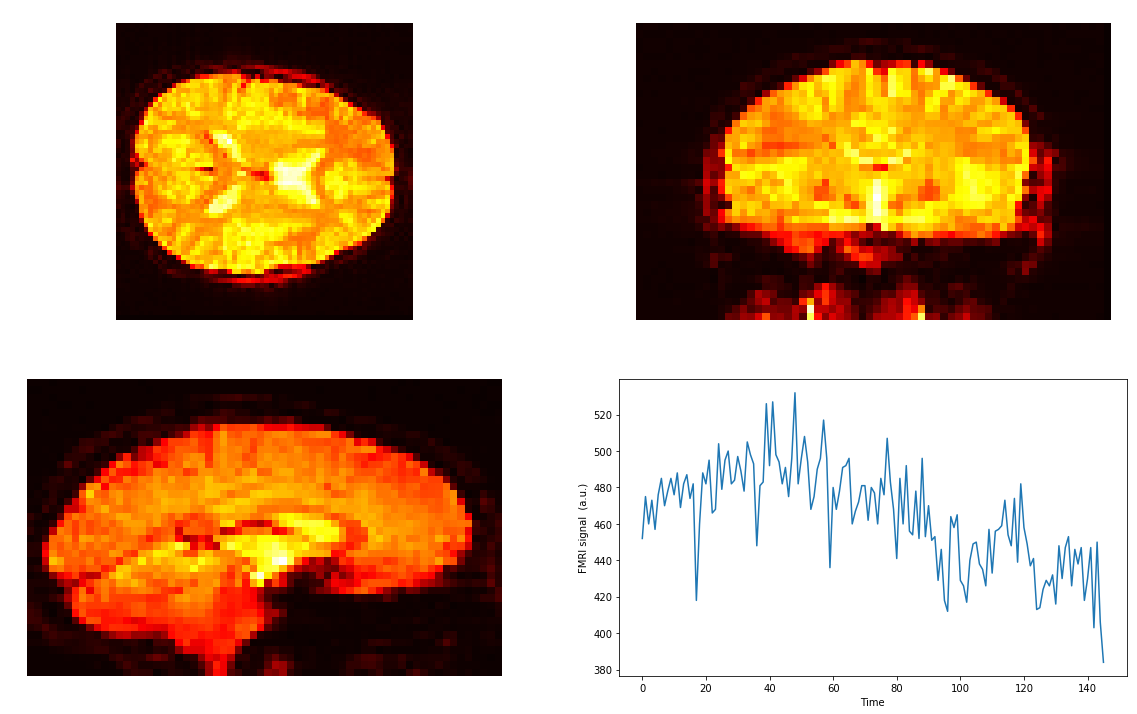

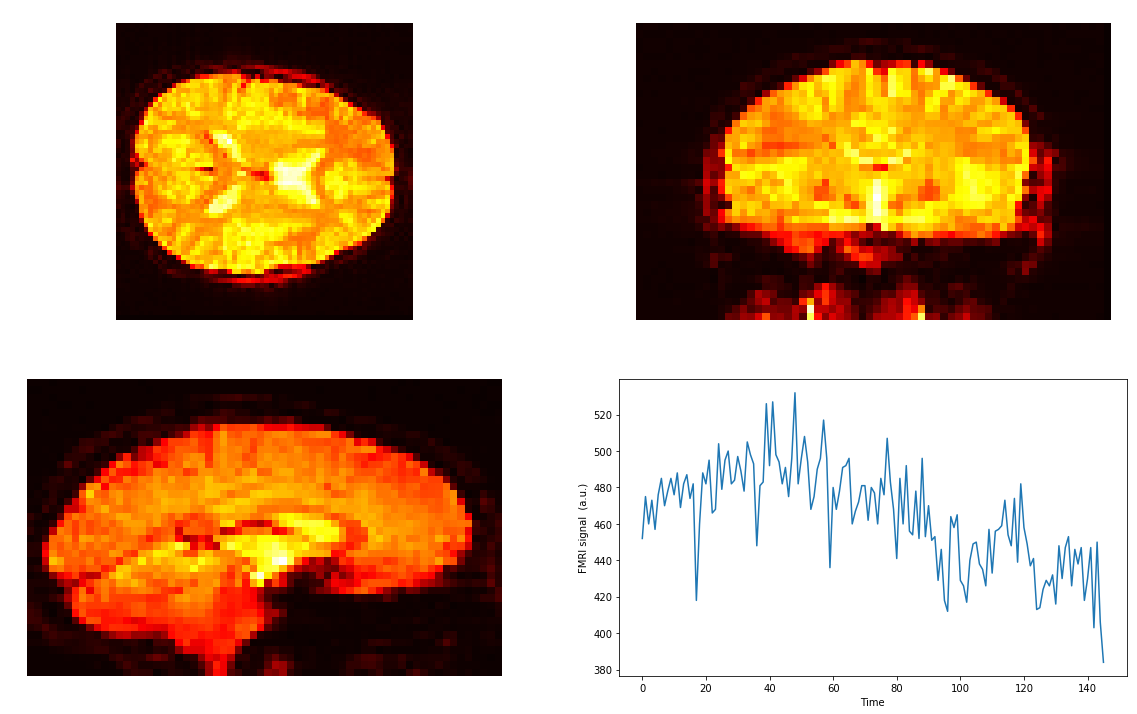

In [340]:
def plot_mean(x=data.shape[0]/2, y=data.shape[1]/2, z=data.shape[2]/2):
    fig, axes = plt.subplots(2, 2)
    ax = axes[0, 0]
    ax.axis('off')
    ax.matshow(mean[:, :, z], cmap=mpl.cm.hot)
    ax = axes[0, 1]
    ax.axis('off')
    ax.matshow(np.rot90(mean[:, y, :]), cmap=mpl.cm.hot)
    ax = axes[1, 0]
    ax.axis('off')
    ax.matshow(np.rot90(mean[x, :, :]), cmap=mpl.cm.hot)
    ax = axes[1, 1]
    ax.plot(data[x, y, z])
    ax.set_xlabel('Time')
    ax.set_ylabel('FMRI signal  (a.u.)')
    fig.set_size_inches(20, 12)
    return fig

import ipywidgets as wdg
import IPython.display as display

pb_widget = wdg.interactive(plot_mean, 
                            x=wdg.IntSlider(min=1, max=data.shape[0], value=data.shape[0]//2),
                            y=wdg.IntSlider(min=1, max=data.shape[1], value=data.shape[1]//2),
                            z=wdg.IntSlider(min=1, max=data.shape[2], value=data.shape[2]//2)
                            )
display.display(pb_widget)

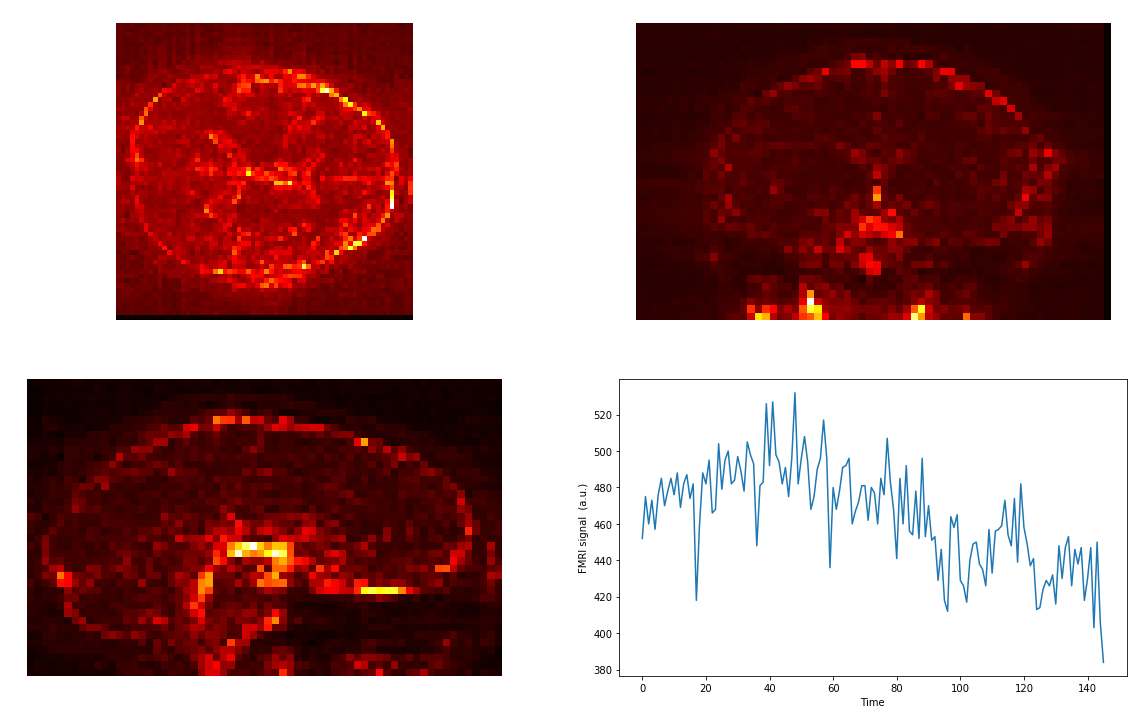

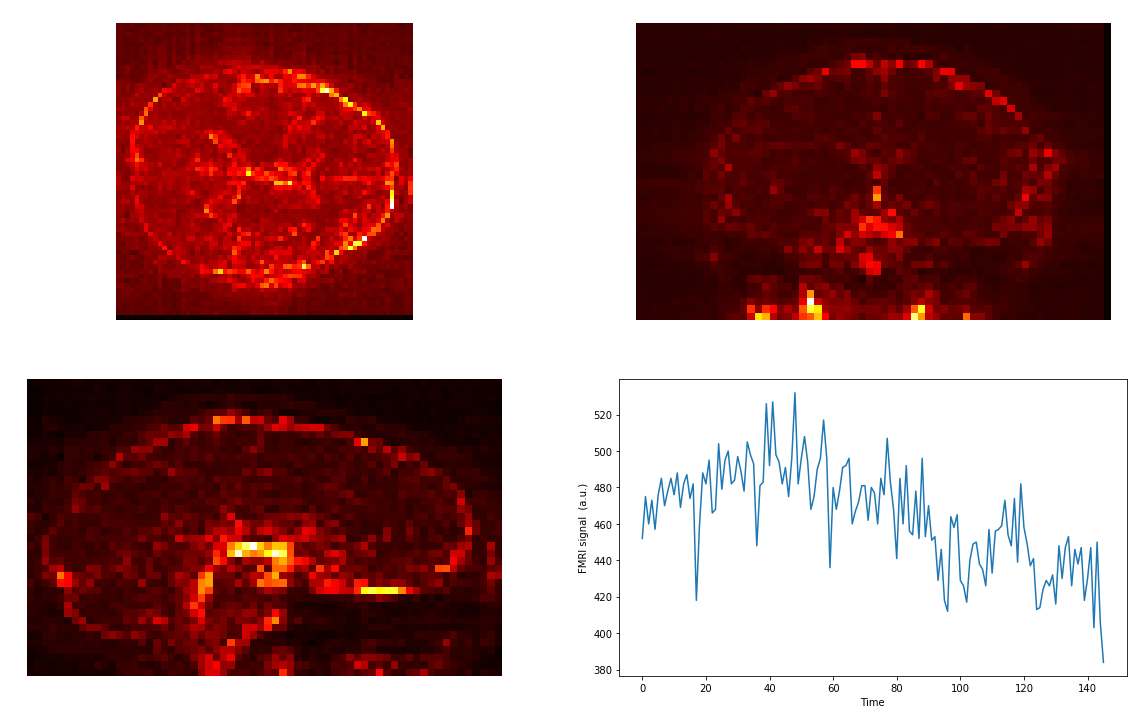

In [341]:
def plot_std(x=data.shape[0]/2, y=data.shape[1]/2, z=data.shape[2]/2):
    fig, axes = plt.subplots(2, 2)
    ax = axes[0, 0]
    ax.axis('off')
    ax.matshow(std[:, :, z], cmap=mpl.cm.hot)
    ax = axes[0, 1]
    ax.axis('off')
    ax.matshow(np.rot90(std[:, y, :]), cmap=mpl.cm.hot)
    ax = axes[1, 0]
    ax.axis('off')
    ax.matshow(np.rot90(std[x, :, :]), cmap=mpl.cm.hot)
    ax = axes[1, 1]
    ax.plot(data[x, y, z])
    ax.set_xlabel('Time')
    ax.set_ylabel('FMRI signal  (a.u.)')
    fig.set_size_inches(20, 12)
    return fig

import ipywidgets as wdg
import IPython.display as display

pb_widget = wdg.interactive(plot_std, 
                            x=wdg.IntSlider(min=1, max=data.shape[0], value=data.shape[0]//2),
                            y=wdg.IntSlider(min=1, max=data.shape[1], value=data.shape[1]//2),
                            z=wdg.IntSlider(min=1, max=data.shape[2], value=data.shape[2]//2)
                            )
display.display(pb_widget)

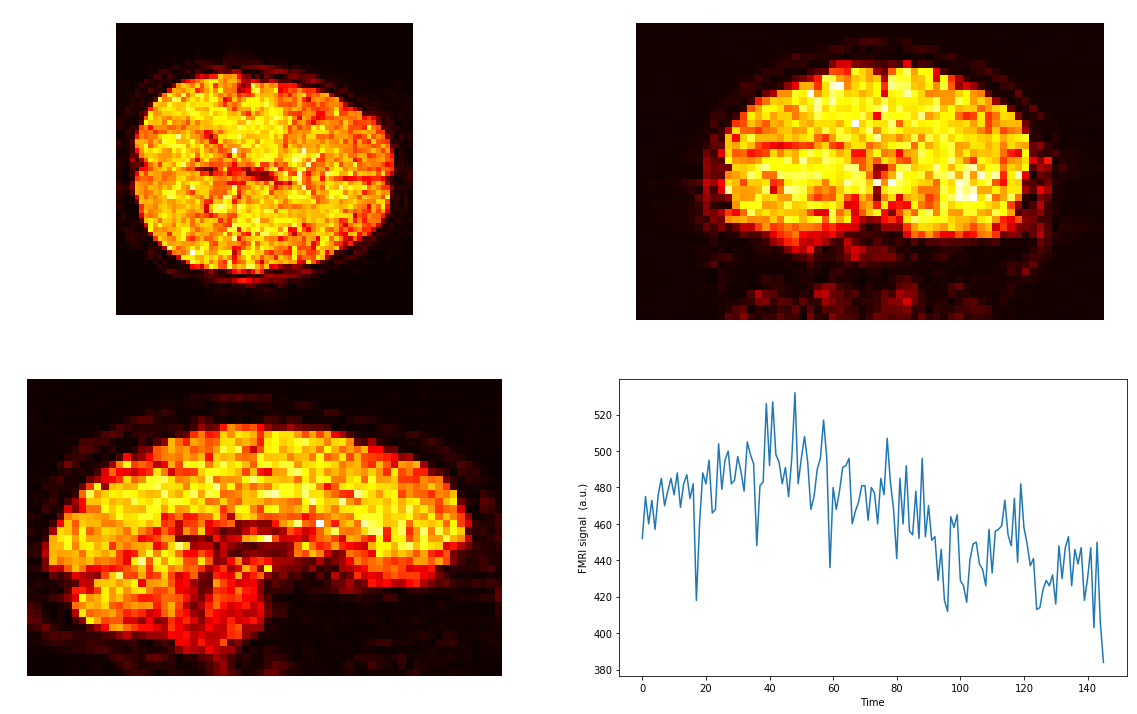

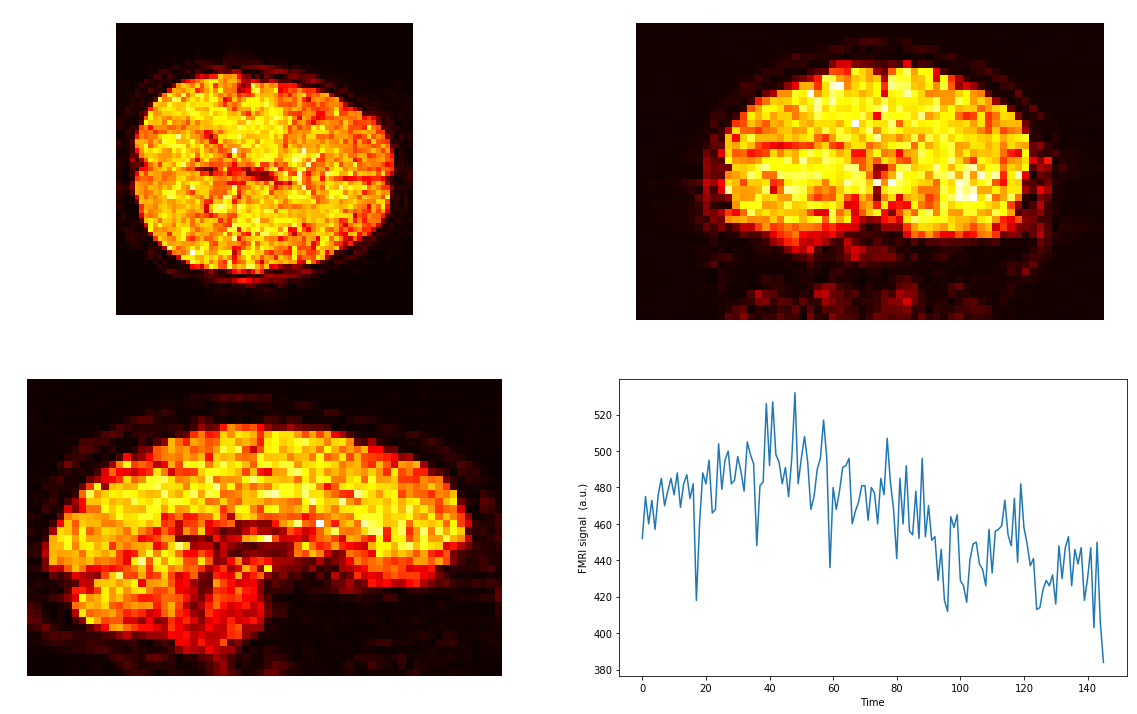

In [342]:
def plot_tsnr(x=data.shape[0]/2, y=data.shape[1]/2, z=data.shape[2]/2):
    fig, axes = plt.subplots(2, 2)
    ax = axes[0, 0]
    ax.axis('off')
    ax.matshow(tsnr[:, :, z], cmap=mpl.cm.hot)
    ax = axes[0, 1]
    ax.axis('off')
    ax.matshow(np.rot90(tsnr[:, y, :]), cmap=mpl.cm.hot)
    ax = axes[1, 0]
    ax.axis('off')
    ax.matshow(np.rot90(tsnr[x, :, :]), cmap=mpl.cm.hot)
    ax = axes[1, 1]
    ax.plot(data[x, y, z])
    ax.set_xlabel('Time')
    ax.set_ylabel('FMRI signal  (a.u.)')
    fig.set_size_inches(20, 12)
    return fig

import ipywidgets as wdg
import IPython.display as display

pb_widget = wdg.interactive(plot_tsnr, 
                            x=wdg.IntSlider(min=1, max=data.shape[0], value=data.shape[0]//2),
                            y=wdg.IntSlider(min=1, max=data.shape[1], value=data.shape[1]//2),
                            z=wdg.IntSlider(min=1, max=data.shape[2], value=data.shape[2]//2)
                            )
display.display(pb_widget)

In [ ]:
def plot_data(x=data.shape[0]/2, y=data.shape[1]/2, z=data.shape[2]/2):
    fig, axes = plt.subplots(2, 2)
    ax = axes[0, 0]
    ax.axis('off')
    ax.matshow(data[:, :, z, :], cmap=mpl.cm.hot)
    ax = axes[0, 1]
    ax.axis('off')
    ax.matshow(np.rot90(data[:, y, :, :]), cmap=mpl.cm.hot)
    ax = axes[1, 0]
    ax.axis('off')
    ax.matshow(np.rot90(data[x, :, :, :]), cmap=mpl.cm.hot)
    ax = axes[1, 1]
    ax.axis('off')
    ax.matshow(np.rot90(data[x, :, :, :]), cmap=mpl.cm.hot)
    fig.set_size_inches(20, 12)
    return fig

import ipywidgets as wdg
import IPython.display as display

pb_widget = wdg.interactive(plot_mean, 
                            x=wdg.IntSlider(min=1, max=data.shape[0], value=data.shape[0]//2),
                            y=wdg.IntSlider(min=1, max=data.shape[1], value=data.shape[1]//2),
                            z=wdg.IntSlider(min=1, max=data.shape[2], value=data.shape[2]//2)
                            )
display.display(pb_widget)